<a href="https://colab.research.google.com/github/SofiaAzzahra09/Capstone_Project-GarmentProductivity/blob/main/RFECapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediksi Produktivitas Buruh di Perusahaan Garmen dengan Menggunakan Regresi

Nama : Sofia Azzahra Alamsyah

Kelas : Data Science B

Studi Independen  Batch7 : CAKAP

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read data

In [ ]:
url = 'https://raw.githubusercontent.com/SofiaAzzahra09/Capstone_Project-GarmentProductivity/main/garments_worker_productivity.xlsx'
data = pd.read_excel(url)
df = pd.DataFrame(data)

In [70]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**1. DATA UNDERSTANDING**

1.1 data description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

1.2 Dimensi data

In [ ]:
df.shape

(1197, 15)

1.3 Statistik deskriptif

In [ ]:
df.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


**2. DATA CLEANING**

2.1 missing value

In [ ]:
df2 = df.copy()

In [ ]:
df2['department'].value_counts().index.to_list()
# df['department'].unique()

['sewing', 'finishing ', 'finishing']

pada department finishing terdapat duplikasi, dimana terdapat perbedaan berupa tambahan spasi di akhir kata penulisan finishing, saya melakukan penghapusan spasi tersebut agar department tidak ada yang sama

In [ ]:
df2['department'] = df2['department'].str.strip()
df2['department'].value_counts().index.to_list()

['sewing', 'finishing']

menghapus spasi yang berlebih pada department finishing

In [ ]:
print('\nMissing Value : ')
df2.isnull().sum()


Missing Value : 


,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
wip_department = df2.groupby('department')['wip'].sum()
wip_department

,wip
department,
finishing,0.0
sewing,822612.0


Karena pada variabel wip terdapat missing value lebih dari setengah data yang seharusnya dan hanya pada department finishing, handling missing value dengan diganti dengan 0.

In [ ]:
df2['wip'].fillna(0, inplace=True)
print(df2['wip'].isnull().sum())

0


<ipython-input-7-e073655f05ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['wip'].fillna(0, inplace=True)


In [ ]:
df2['wip']

,wip
0,1108.0
1,0.0
2,968.0
3,968.0
4,1170.0
...,...
1192,0.0
1193,0.0
1194,0.0
1195,0.0


In [ ]:
df2.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


In [ ]:
wip_depart = df2.groupby('department')['wip'].sum()
wip_depart

,wip
department,
finishing,0.0
sewing,822612.0


In [ ]:
df2['date'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-03 00:00:00', '2015-01-04 00:00:00',
 '2015-01-05 00:00:00', '2015-01-06 00:00:00', '2015-01-07 00:00:00',
 '2015-01-08 00:00:00', '2015-01-10 00:00:00', '2015-01-11 00:00:00',
 '2015-01-12 00:00:00', '2015-01-13 00:00:00', '2015-01-14 00:00:00',
 '2015-01-15 00:00:00', '2015-01-17 00:00:00', '2015-01-18 00:00:00',
 '2015-01-19 00:00:00', '2015-01-20 00:00:00', '2015-01-21 00:00:00',
 '2015-01-22 00:00:00', '2015-01-24 00:00:00', '2015-01-25 00:00:00',
 '2015-01-26 00:00:00', '2015-01-27 00:00:00', '2015-01-28 00:00:00',
 '2015-01-29 00:00:00', '2015-01-31 00:00:00', '2015-02-01 00:00:00',
 '2015-02-02 00:00:00', '2015-02-03 00:00:00', '2015-02-04 00:00:00',
 '2015-02-05 00:00:00', '2015-02-07 00:00:00', '2015-02-08 00:00:00',
 '2015-02-09 00:00:00', '2015-02-10 00:00:00', '2015-02-11 00:00:00',
 '2015-02-12 00:00:00', '2015-02-14 00:00:00', '2015-02-15 00:00:00',
 '2015-02-16 00:00:00', '2015-02-17 00:00:00', '2015-02-18 00:00:00',
 '20

In [ ]:
df2.drop('date', axis=1, inplace=True)

In [ ]:
df2['department'].value_counts()

,count
department,
sewing,691
finishing,506


In [ ]:
df2['day'].value_counts().index.to_list()

['Wednesday', 'Sunday', 'Tuesday', 'Thursday', 'Monday', 'Saturday']

pada hari jumat tidak adanya pekerjaan/libur kerja

In [ ]:
df2['day'].value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


In [ ]:
df2['quarter'].value_counts().index.to_list()

['Quarter1', 'Quarter2', 'Quarter4', 'Quarter3', 'Quarter5']

urutan hari dan quarter tidak berurutan, nanti akan dilakukan encoding dengan mapping

In [ ]:
df2['quarter'].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


In [ ]:
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


In [ ]:
df[df['quarter'] == 'Quarter2'].head(12)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
126,1/8/2015,Quarter2,finishing,Thursday,1,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.947689
127,1/8/2015,Quarter2,finishing,Thursday,4,0.8,3.94,NaN,12600,0,0.0,0,0,20.0,0.919905
128,1/8/2015,Quarter2,sweing,Thursday,9,0.8,26.16,1216.0,10620,88,0.0,0,0,59.0,0.900216
129,1/8/2015,Quarter2,finishing,Thursday,9,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.891723
130,1/8/2015,Quarter2,sweing,Thursday,1,0.8,26.16,1189.0,10620,75,0.0,0,0,59.0,0.850502
131,1/8/2015,Quarter2,sweing,Thursday,4,0.8,28.08,942.0,10530,75,0.0,0,0,58.5,0.850182
132,1/8/2015,Quarter2,sweing,Thursday,7,0.8,25.90,1050.0,10170,60,0.0,0,0,56.5,0.850137
133,1/8/2015,Quarter2,sweing,Thursday,8,0.8,25.90,1026.0,10170,60,0.0,0,0,56.5,0.850137
134,1/8/2015,Quarter2,finishing,Thursday,2,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.835758
135,1/8/2015,Quarter2,finishing,Thursday,5,0.7,4.15,NaN,3840,0,0.0,0,0,8.0,0.821354


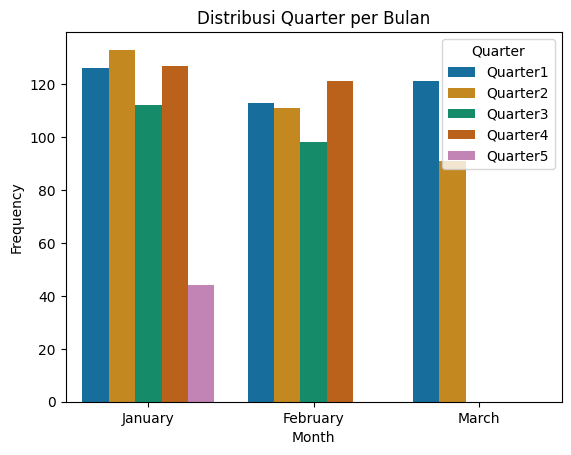

In [ ]:
df['month_name'] = df['date'].dt.strftime('%B')

sns.countplot(data=df, x='month_name', hue='quarter', order=[
    'January', 'February', 'March'], palette="colorblind")
plt.title('Distribusi Quarter per Bulan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Quarter')
plt.show()

pada kolom quartal jika dilihat langsung di dataset terdapat pola :

quartal 1 : tanggal 1-7

quartal 2 : tanggal 8-14

quartal 3 : tanggal 15-21

quartal 4 : tanggal 22-28

quartal 5 : tanggal 29-31

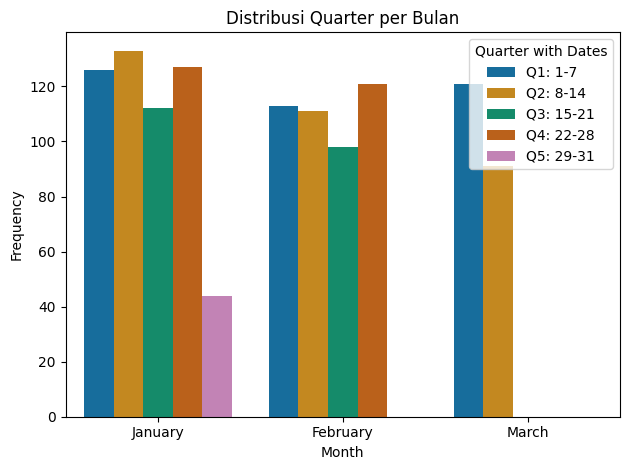

In [ ]:
df['month_name'] = df['date'].dt.strftime('%B')
df['day'] = df['date'].dt.day

def quarter_with_dates(day):
    if 1 <= day <= 7:
        return 'Q1: 1-7'
    elif 8 <= day <= 14:
        return 'Q2: 8-14'
    elif 15 <= day <= 21:
        return 'Q3: 15-21'
    elif 22 <= day <= 28:
        return 'Q4: 22-28'
    else:
        return 'Q5: 29-31'

df['cluster_quarter'] = df['day'].apply(quarter_with_dates)

sns.countplot(
    data=df,
    x='month_name',
    hue='cluster_quarter',
    order=['January', 'February', 'March'],
    palette='colorblind'
)
plt.title('Distribusi Quarter per Bulan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Quarter with Dates')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df2['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4])

In [ ]:
df2['no_of_style_change'].value_counts()

,count
no_of_style_change,
0,1050
1,114
2,33


In [71]:
df2['idle_men'].unique()

array([ 0, 10, 15, 45, 37, 30, 35, 20, 25, 40])

In [72]:
df2['no_of_workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [73]:
df2['idle_time'].unique()

array([  0. ,  90. , 150. , 270. , 300. ,   2. ,   5. ,   8. ,   4.5,
         3.5,   4. ,   6.5])

2.2 Handling outlier

In [ ]:
df3 = df2.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

membedakan kolom numerik dan kategorik

In [ ]:
numerical_columns = df3.select_dtypes(include=['number'])
print("Kolom Numerik:", numerical_columns.columns.tolist())

categorical_columns = df3.select_dtypes(exclude=['number'])
print("Kolom Kategorik:", categorical_columns.columns.tolist())

Kolom Numerik: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
Kolom Kategorik: ['quarter', 'department', 'day']


mencari outlier

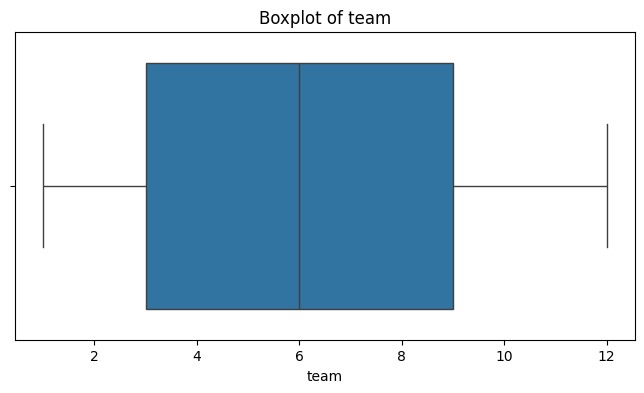

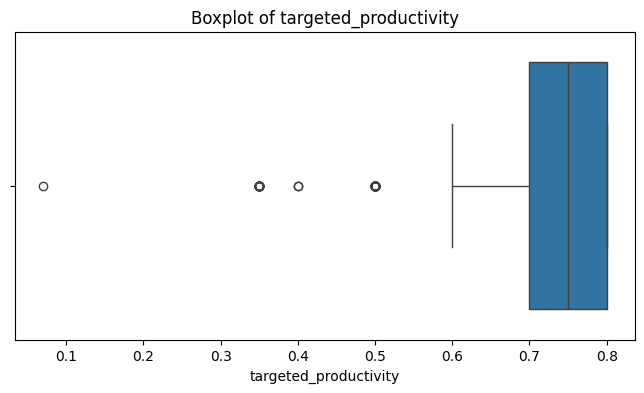

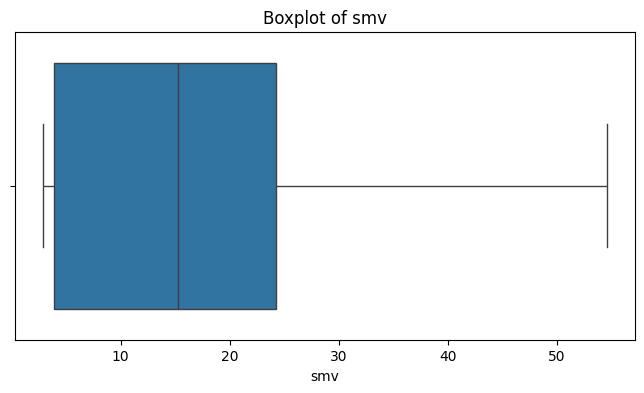

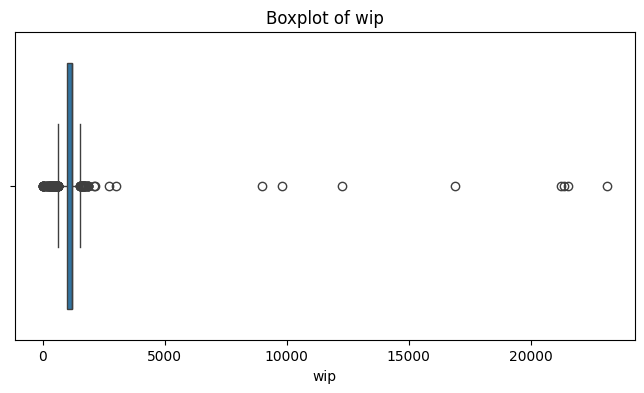

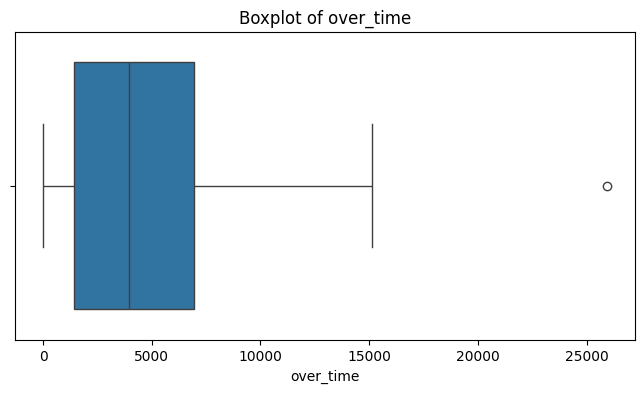

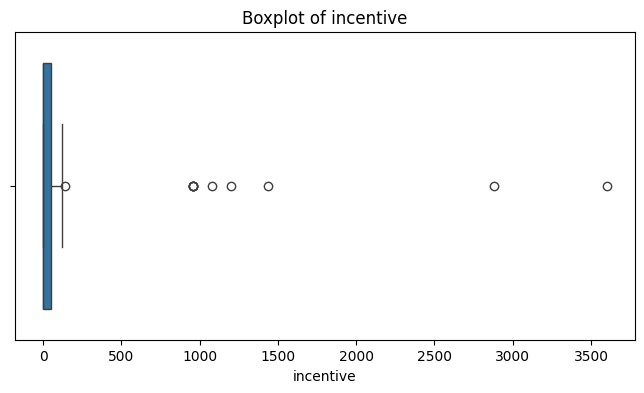

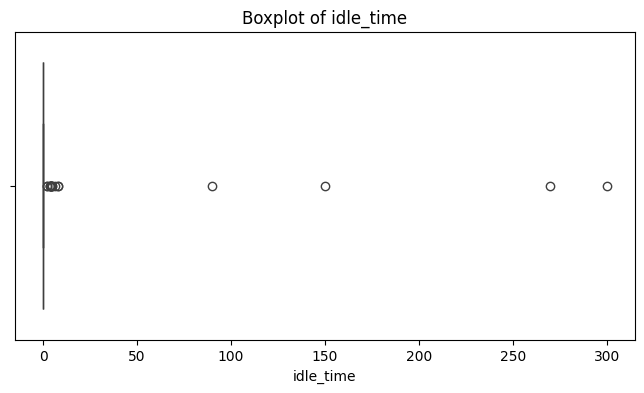

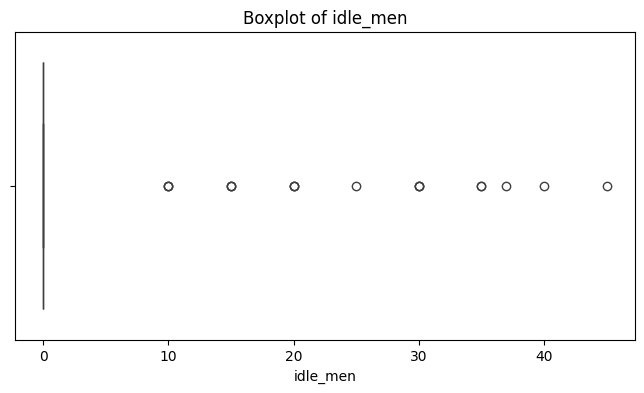

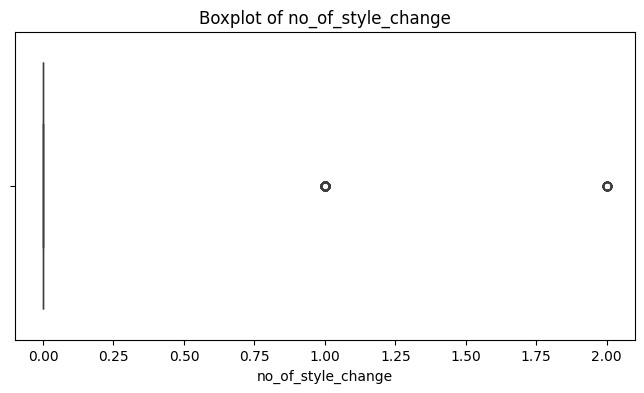

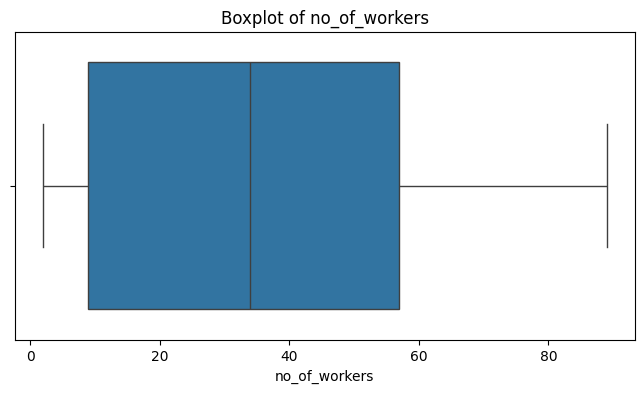

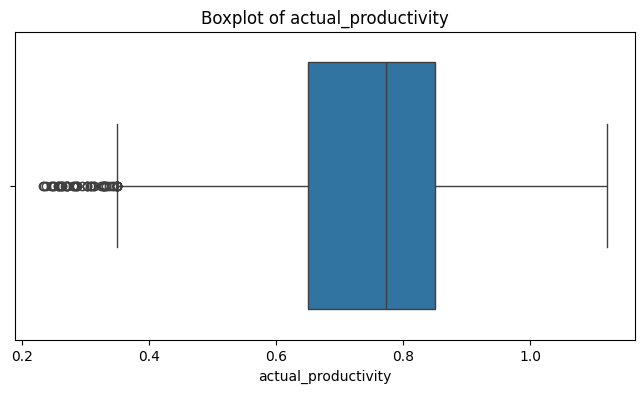

In [ ]:
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df3[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

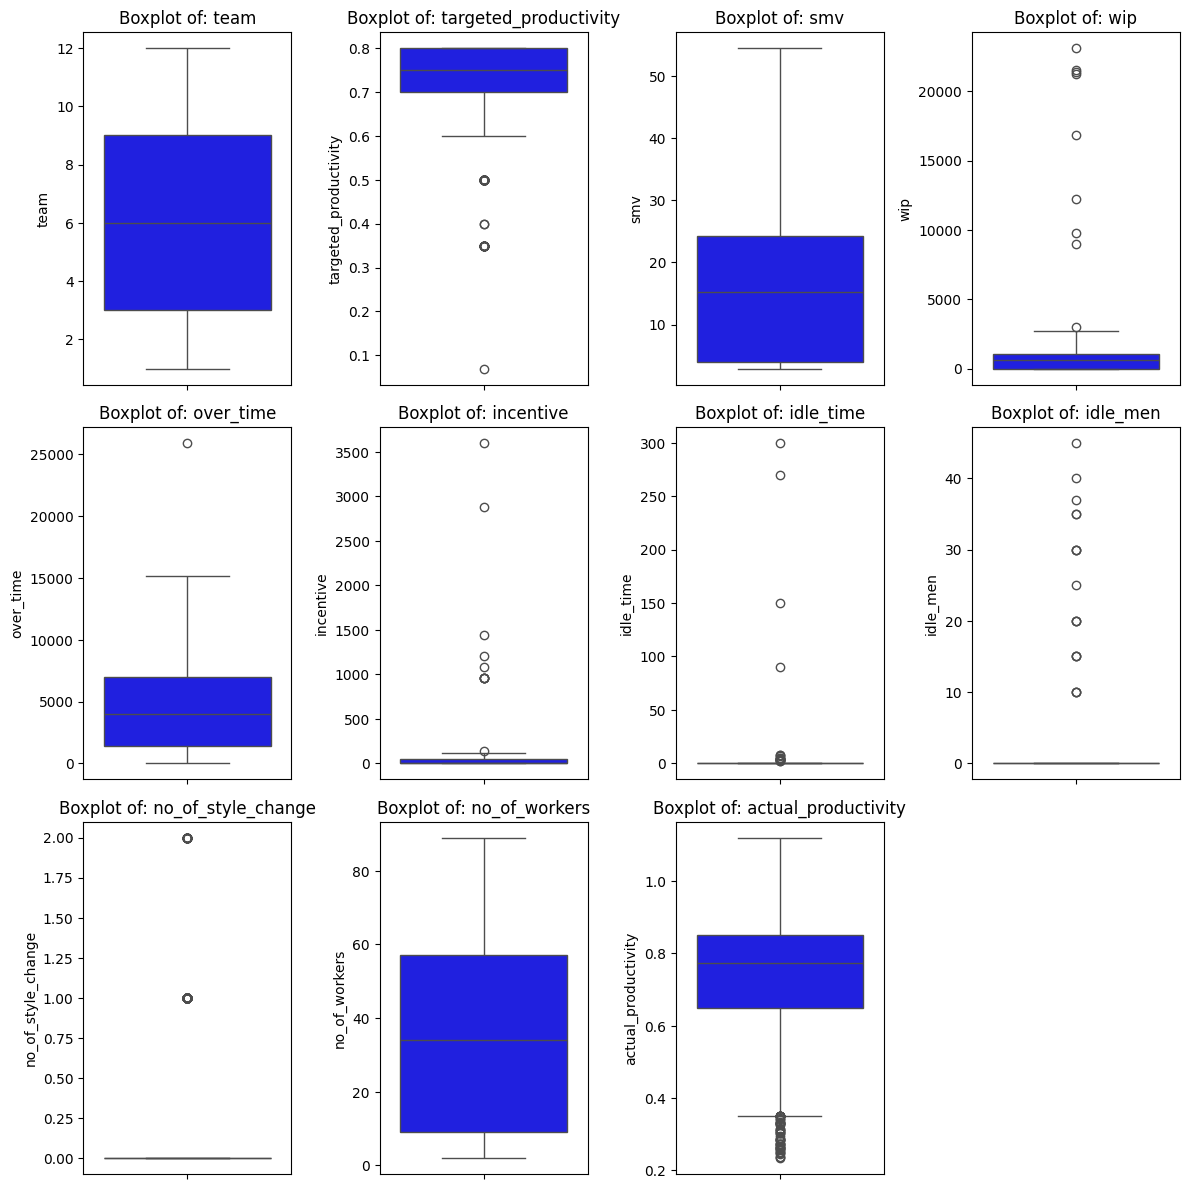

In [ ]:
num_cols = 4
num_rows = (len(numerical_columns.columns) // num_cols) + (len(numerical_columns.columns) % num_cols != 0)

plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df3, y=col, color='blue')
    plt.title(f'Boxplot of: {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Kolom numerik yang memiliki outlier:

1. targeted_productivity
2. wip
3. over_time
4. incentive

Handling outlier kolom numerik

In [ ]:
outlier_columns = ['targeted_productivity', 'wip', 'over_time', 'incentive']

for col in outlier_columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df3.loc[df3[col] > upper_bound, col] = upper_bound
    df3.loc[df3[col] < lower_bound, col] = lower_bound

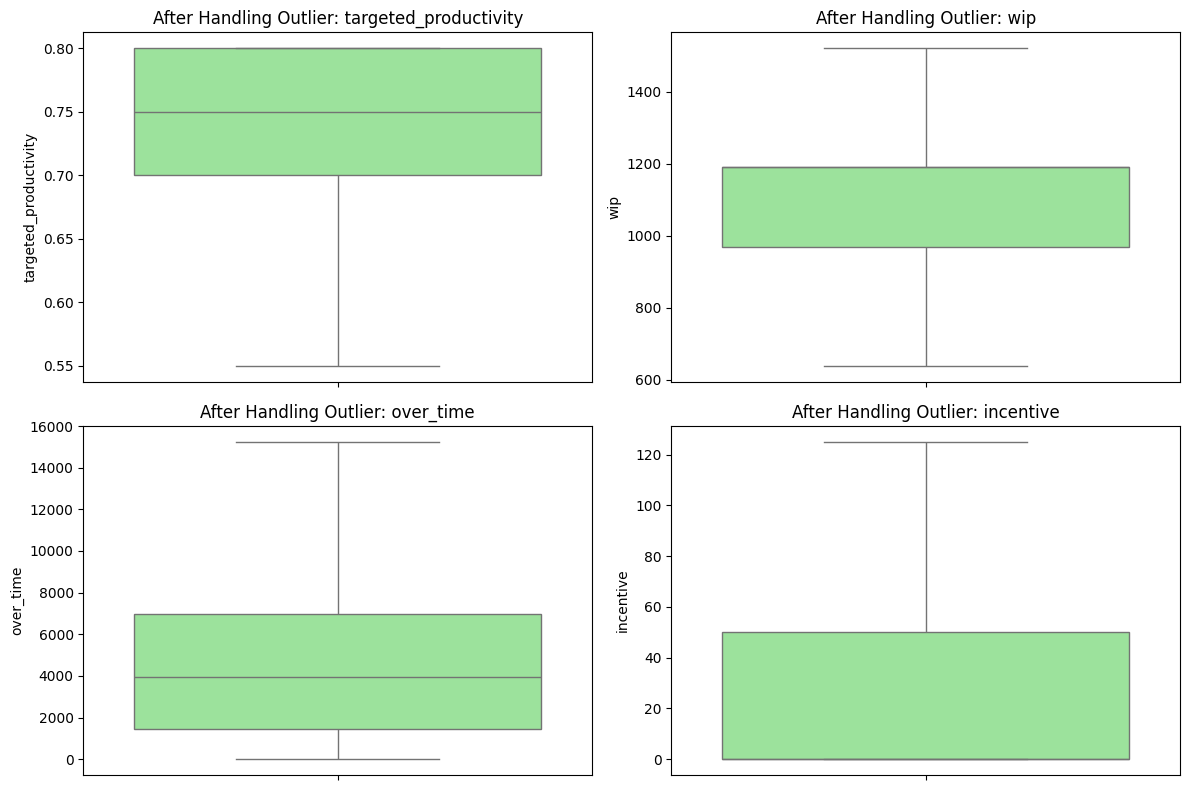

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df3, y=col, color='lightgreen')
    plt.title(f'After Handling Outlier: {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

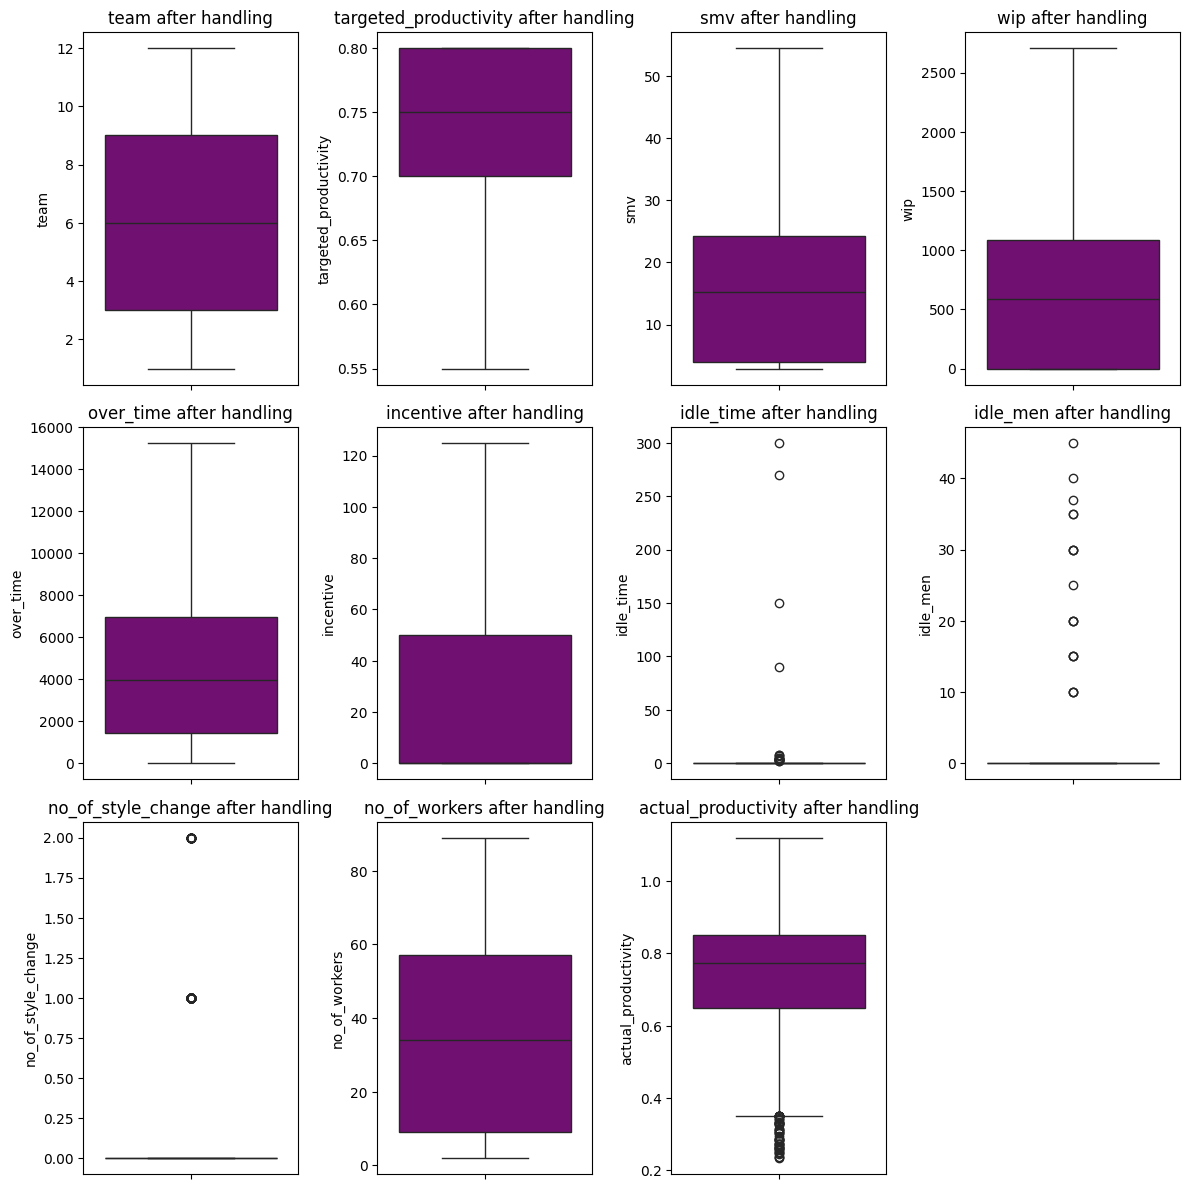

In [ ]:
num_cols = 4
num_rows = (len(numerical_columns.columns) // num_cols) + (len(numerical_columns.columns) % num_cols != 0)

plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df3, y=col, color='purple')
    plt.title(f'{col} after handling')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**3. EDA**

In [ ]:
df4 = df3.copy()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

3. 1 Melakukan Encoding

untuk memudahkan pemodelan, beberapa variabel yang dapat di encoding yaitu :

a. kolom day dan quarter menggunakan ordinal Encoding: data kategori memiliki urutan  

b.department menggunakan one-Hot Encoding: mengubah kategori menjadi representasi biner (0 dan 1)

In [ ]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Saturday': 6,
    'Sunday': 7
}

df4['day_encoded'] = df4['day'].map(day_mapping)

print(df4[['day', 'day_encoded']])

            day  day_encoded
0      Thursday            4
1      Thursday            4
2      Thursday            4
3      Thursday            4
4      Thursday            4
...         ...          ...
1192  Wednesday            3
1193  Wednesday            3
1194  Wednesday            3
1195  Wednesday            3
1196  Wednesday            3

[1197 rows x 2 columns]


<ipython-input-29-2c411ecb9dc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


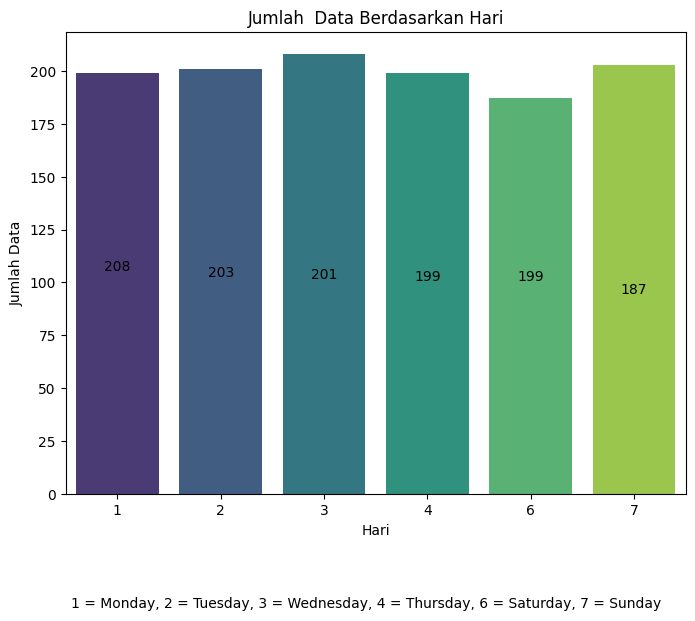

In [ ]:
day_counts = df4['day_encoded'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Jumlah  Data Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
info_text = "1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 6 = Saturday, 7 = Sunday"
plt.figtext(0.5, -0.08, info_text, ha='center', fontsize=10, color='black')
for i, v in enumerate(day_counts.values):
    plt.text(i, v * 0.5, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [ ]:
df4 = pd.get_dummies(df4, columns=['department'])

print(df4)

       quarter        day  team  targeted_productivity    smv     wip  \
0     Quarter1   Thursday     8                   0.80  26.16  1108.0   
1     Quarter1   Thursday     1                   0.75   3.94     0.0   
2     Quarter1   Thursday    11                   0.80  11.41   968.0   
3     Quarter1   Thursday    12                   0.80  11.41   968.0   
4     Quarter1   Thursday     6                   0.80  25.90  1170.0   
...        ...        ...   ...                    ...    ...     ...   
1192  Quarter2  Wednesday    10                   0.75   2.90     0.0   
1193  Quarter2  Wednesday     8                   0.70   3.90     0.0   
1194  Quarter2  Wednesday     7                   0.65   3.90     0.0   
1195  Quarter2  Wednesday     9                   0.75   2.90     0.0   
1196  Quarter2  Wednesday     6                   0.70   2.90     0.0   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0          7080         98        0.0         0     

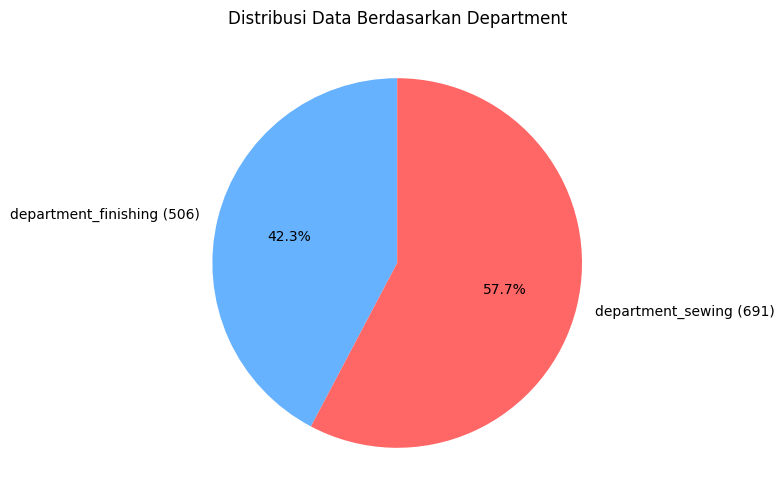

In [ ]:
department_counts = df4[['department_finishing', 'department_sewing']].sum()
labels = [f"{dept} ({count})" for dept, count in zip(department_counts.index, department_counts.values)]

plt.figure(figsize=(8, 6))
plt.pie(
    department_counts.values,
    labels=labels,
    # labels=department_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66B2FF', '#FF6666']
    # explode=(0.1, 0)
)
plt.title('Distribusi Data Berdasarkan Department')
plt.show()

In [ ]:
quartal_mapping = {
    'Quarter1': 1,
    'Quarter2': 2,
    'Quarter3': 3,
    'Quarter4': 4,
    'Quarter5': 5
}

df4['quarter_encoded'] = df4['quarter'].map(quartal_mapping)

print(df4[['quarter', 'quarter_encoded']])

       quarter  quarter_encoded
0     Quarter1                1
1     Quarter1                1
2     Quarter1                1
3     Quarter1                1
4     Quarter1                1
...        ...              ...
1192  Quarter2                2
1193  Quarter2                2
1194  Quarter2                2
1195  Quarter2                2
1196  Quarter2                2

[1197 rows x 2 columns]


<ipython-input-33-e89e170bad75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette='viridis')


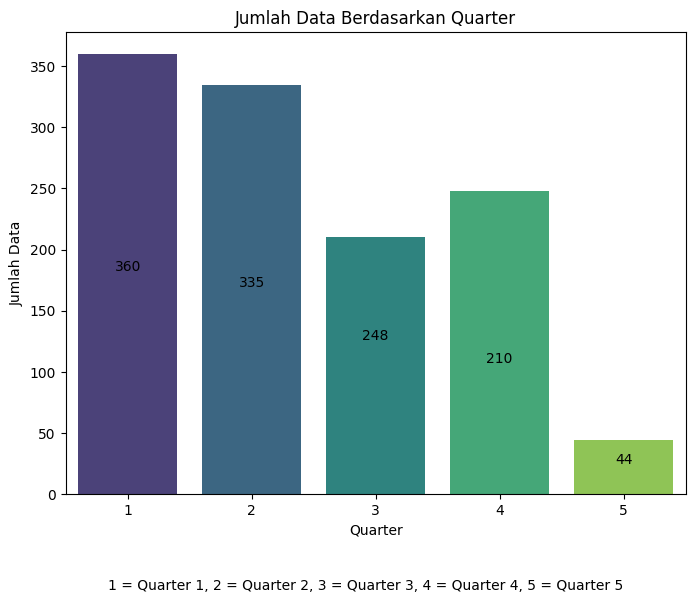

In [ ]:
quarter_counts = df4['quarter_encoded'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette='viridis')
plt.title('Jumlah Data Berdasarkan Quarter')
plt.xlabel('Quarter')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)

info_text = "1 = Quarter 1, 2 = Quarter 2, 3 = Quarter 3, 4 = Quarter 4, 5 = Quarter 5"
plt.figtext(0.5, -0.05, info_text, ha='center', fontsize=10, color='black')

for i, v in enumerate(quarter_counts.values):
    plt.text(i, v * 0.5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [ ]:
df4.drop(columns=['day', 'quarter'], inplace=True)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  day_encoded            1197 non-null   int64  
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  quarter_encoded        1197 non-null   int64  
dtypes: b

In [ ]:
df4.shape

(1197, 15)

3. 2 korelasi variabel prediktor dengan variabel target

In [ ]:
num_predictor_columns = ['targeted_productivity', 'wip', 'over_time', 'smv',
                         'incentive', 'idle_time', 'idle_men',
                         'no_of_style_change', 'no_of_workers']

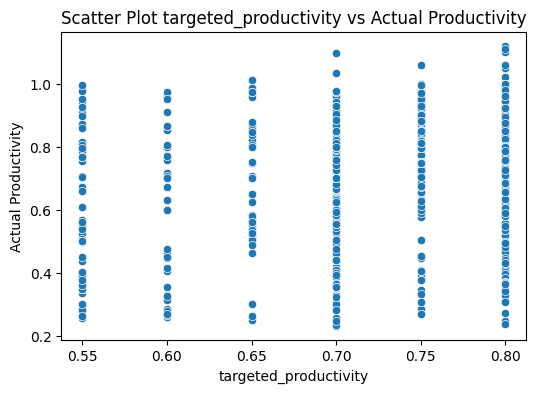

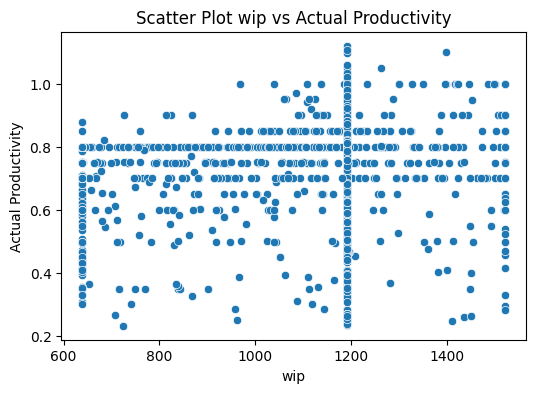

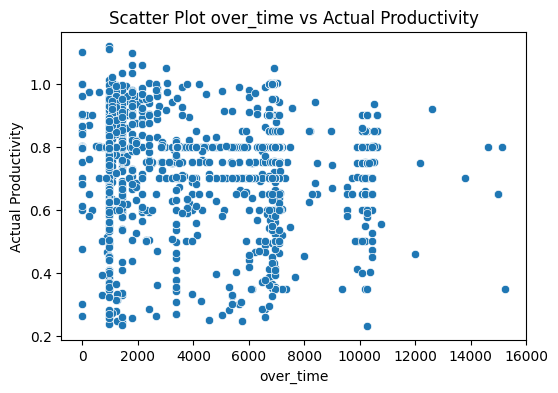

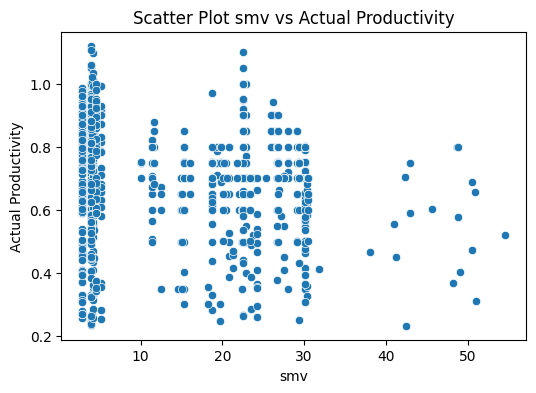

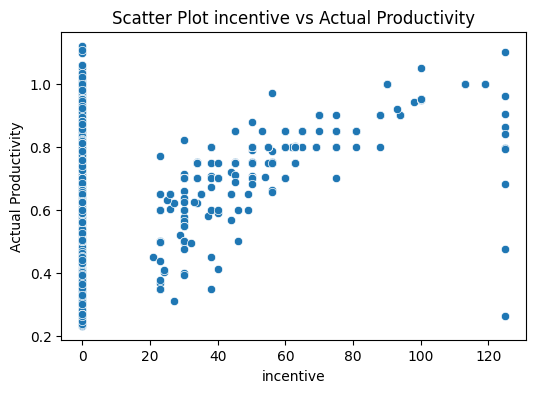

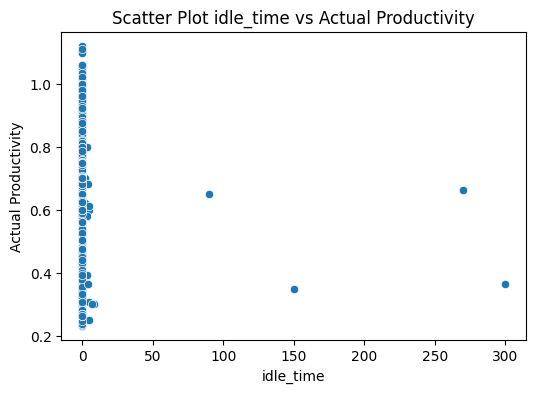

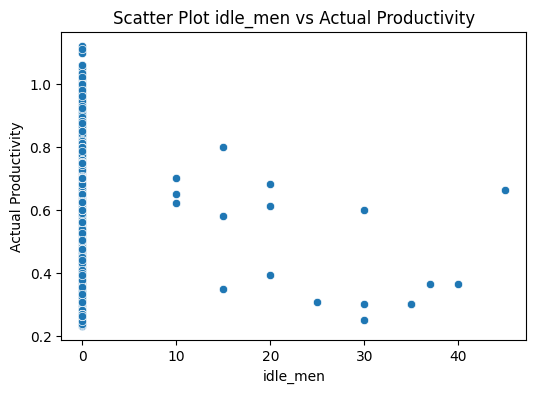

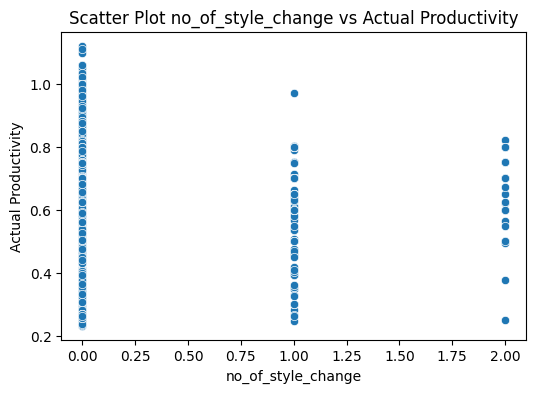

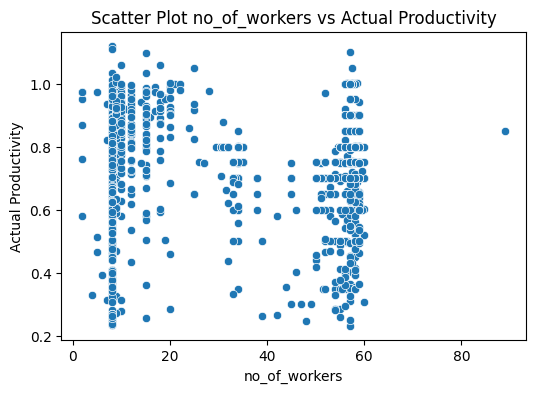

In [ ]:
for col in num_predictor_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df3[col], y=df3['actual_productivity'])
    plt.title(f"Scatter Plot {col} vs Actual Productivity")
    plt.xlabel(col)
    plt.ylabel('Actual Productivity')
    plt.show()

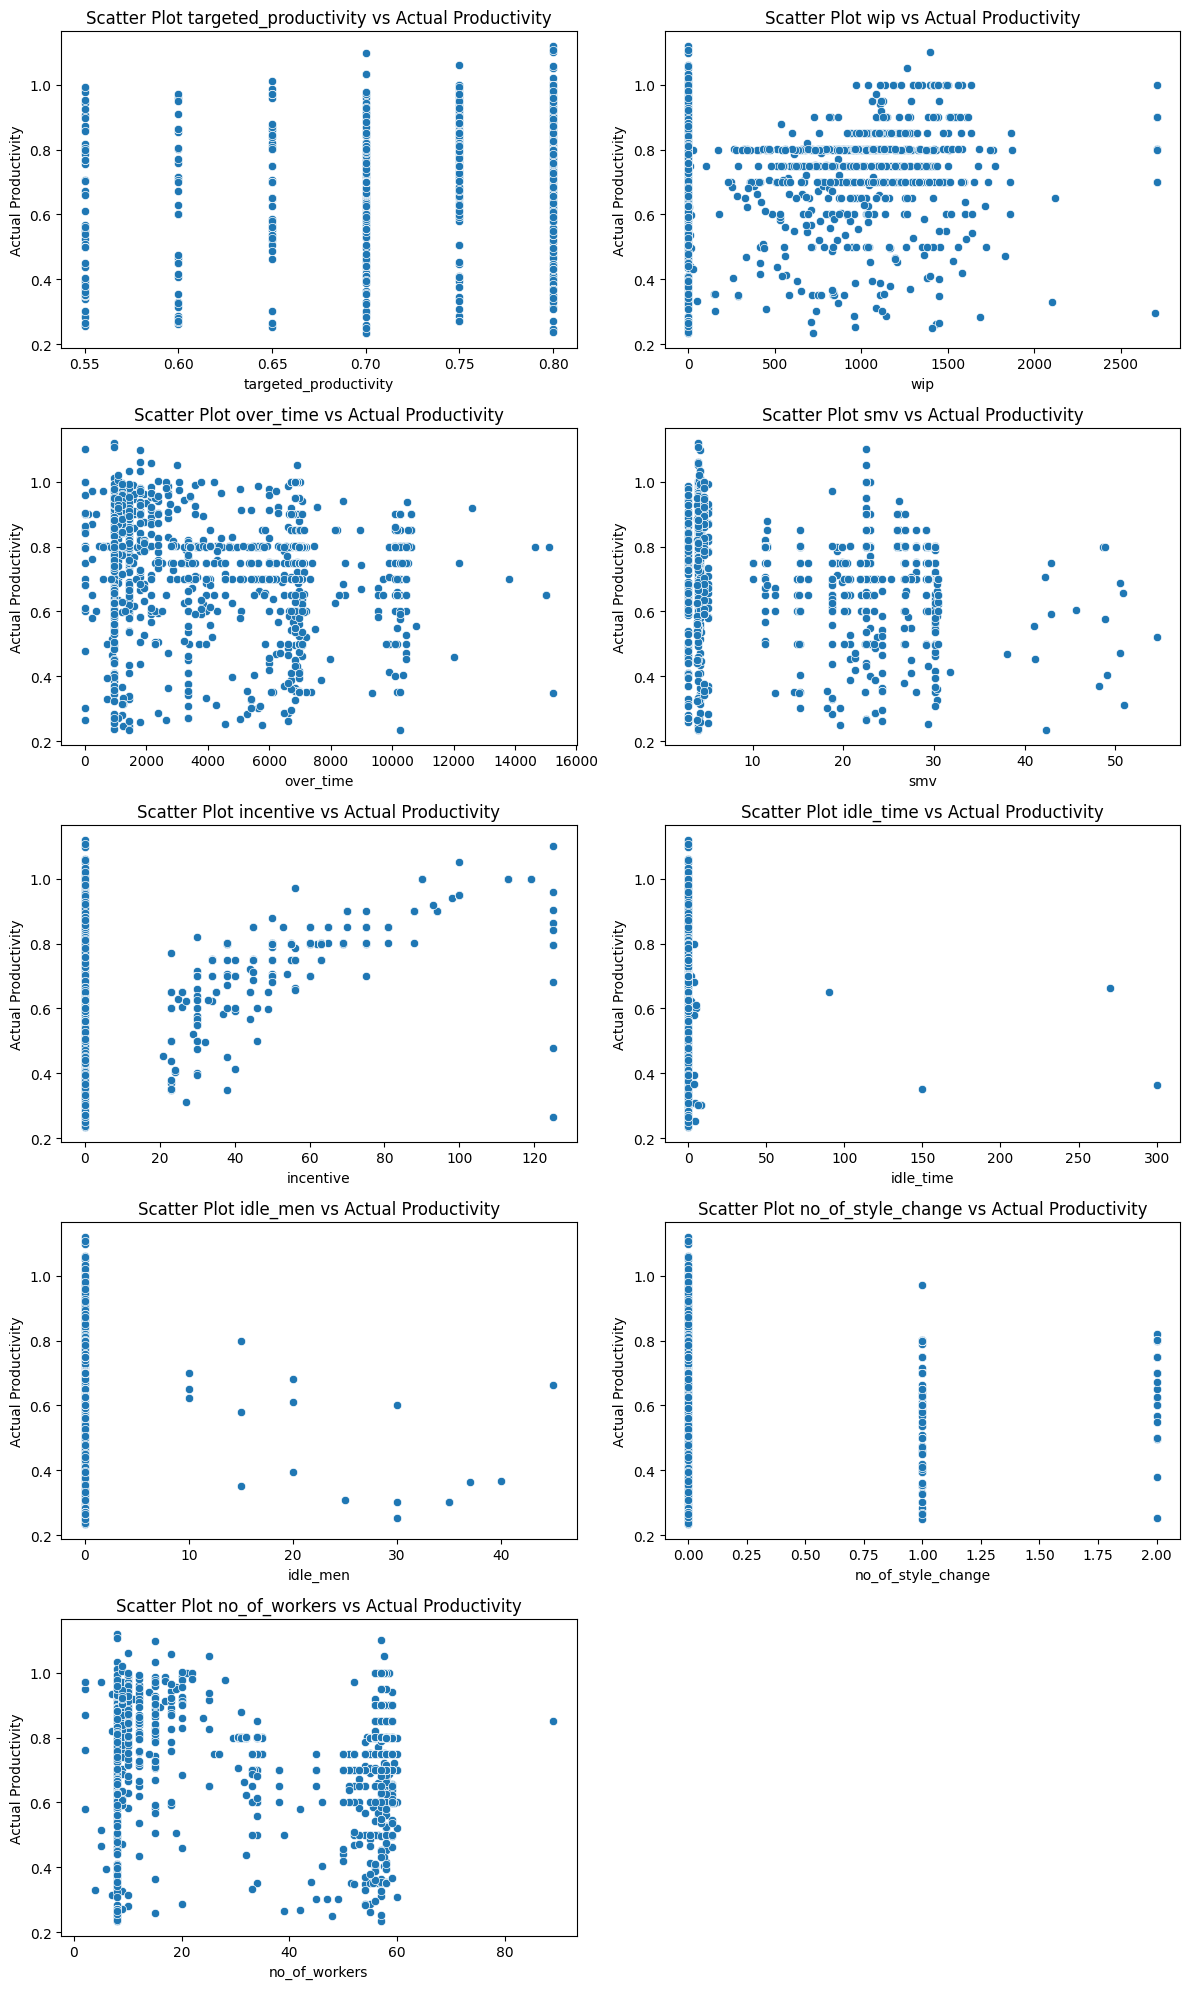

In [ ]:
plt.figure(figsize=(12, 20))

for i, col in enumerate(num_predictor_columns, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=df3[col], y=df3['actual_productivity'])
    plt.title(f"Scatter Plot {col} vs Actual Productivity")
    plt.xlabel(col)
    plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()


Targeted_productivity memiliki korelasi yang lemah karena nilai actual_productivity bervariasi untuk nilai tetap targeted_productivity

Wip : tidak ada pola linear, karena data tersebar di berbagai tingkat wip.

Over_time : pada over_time rendah, tetapi actual_productivity tinggi. Saat over_time tinggi, actual_productivity ada yang rendah dan ada yang tinggi.

Smv : pola data yang tesebar mirip seperti variable over_time.

Incentive memiliki korelasi positif dengan actual productivity.

Idle_time : saat terjadi idle_time produktivitas menjadi menurun.

Number_of_workers : pola persebaran tidak jelas, karena hasil produktivitas bervariasi di semua nilai no_of_workers

Idle_men : saat idle_men di nilai 0, produktivitas cenderung tercapai/tinggi

No_of_style_change : jika terjadi perubahan desain, produktivitas cenderung tinggi, namun saat terjadi perubahan, produktivitas cenderung menurun.


In [ ]:
for col in num_predictor_columns:
    correlation = df[col].corr(df['actual_productivity'])
    print(f"Korelasi antara {col} dan actual_productivity: {correlation}")

Korelasi antara targeted_productivity dan actual_productivity: 0.42159388370015033
Korelasi antara wip dan actual_productivity: 0.1311468199168447
Korelasi antara over_time dan actual_productivity: -0.0542058371400214
Korelasi antara smv dan actual_productivity: -0.12208884072558182
Korelasi antara incentive dan actual_productivity: 0.07653762727386514
Korelasi antara idle_time dan actual_productivity: -0.08085080966234483
Korelasi antara idle_men dan actual_productivity: -0.18173432643347642
Korelasi antara no_of_style_change dan actual_productivity: -0.20736560728146403
Korelasi antara no_of_workers dan actual_productivity: -0.05799059224354602


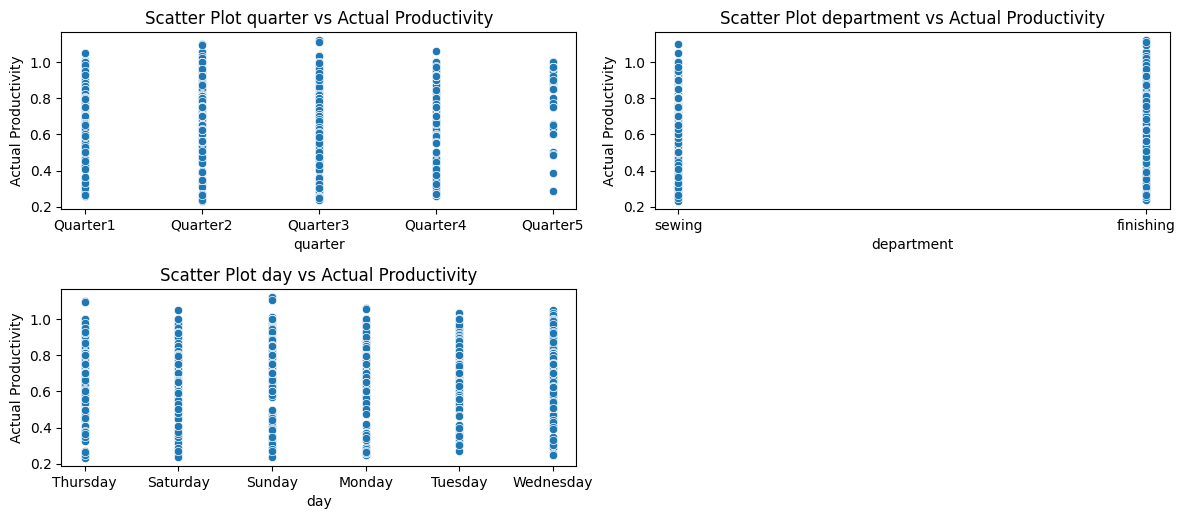

In [ ]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df3[col], y=df3['actual_productivity'])
    plt.title(f"Scatter Plot {col} vs Actual Productivity")
    plt.xlabel(col)
    plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()

**4. Modelling**

4.1 Pemilihan Features Engineer

In [ ]:
df5 = df4.copy()

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  day_encoded            1197 non-null   int64  
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  quarter_encoded        1197 non-null   int64  
dtypes: b

In [ ]:
X = df5.drop(columns=['actual_productivity'])
y = df5['actual_productivity']

In [ ]:
# korelasi Pearson
correlation = df4.corr()['actual_productivity'].sort_values(ascending=False)
print("Korelasi terhadap variabel dependen:")
print(correlation)

Korelasi terhadap variabel dependen:
actual_productivity      1.000000
targeted_productivity    0.445188
incentive                0.298589
department_finishing     0.087624
day_encoded              0.000030
wip                     -0.001194
over_time               -0.048948
quarter_encoded         -0.051970
no_of_workers           -0.057991
idle_time               -0.080851
department_sewing       -0.087624
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


In [ ]:
top_columns = correlation.index[1:6]
print(f"Kolom dengan korelasi tertinggi: {list(top_columns)}")

Kolom dengan korelasi tertinggi: ['targeted_productivity', 'incentive', 'department_finishing', 'day_encoded', 'wip']


In [ ]:
print(top_columns)

Index(['targeted_productivity', 'incentive', 'wip', 'department_finishing',
       'day_encoded'],
      dtype='object')


In [ ]:
# korelasi K-Best
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(score_func=f_classif, k=5)
X_new = k_best_selector.fit_transform(X, y)

mask = k_best_selector.get_support()
selected_features = X.columns[mask]
print(f"Fitur terbaik berdasarkan K-Best: {selected_features}")

Fitur terbaik berdasarkan K-Best: Index(['smv', 'idle_time', 'no_of_workers', 'department_finishing',
       'department_sewing'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
scores = k_best_selector.scores_
# p_values = k_best_selector.pvalues_

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores,
    # 'P-Value': p_values
}).sort_values(by='Score', ascending=True)

print(feature_scores)

                  Feature        Score
10            day_encoded     1.274960
13        quarter_encoded     2.298294
0                    team     3.146092
8      no_of_style_change     4.661504
3                     wip    10.016783
1   targeted_productivity    12.281519
5               incentive    13.168566
7                idle_men    14.450718
4               over_time    29.626974
2                     smv    38.840237
9           no_of_workers   214.959062
6               idle_time  5711.821396
11   department_finishing          inf
12      department_sewing          inf


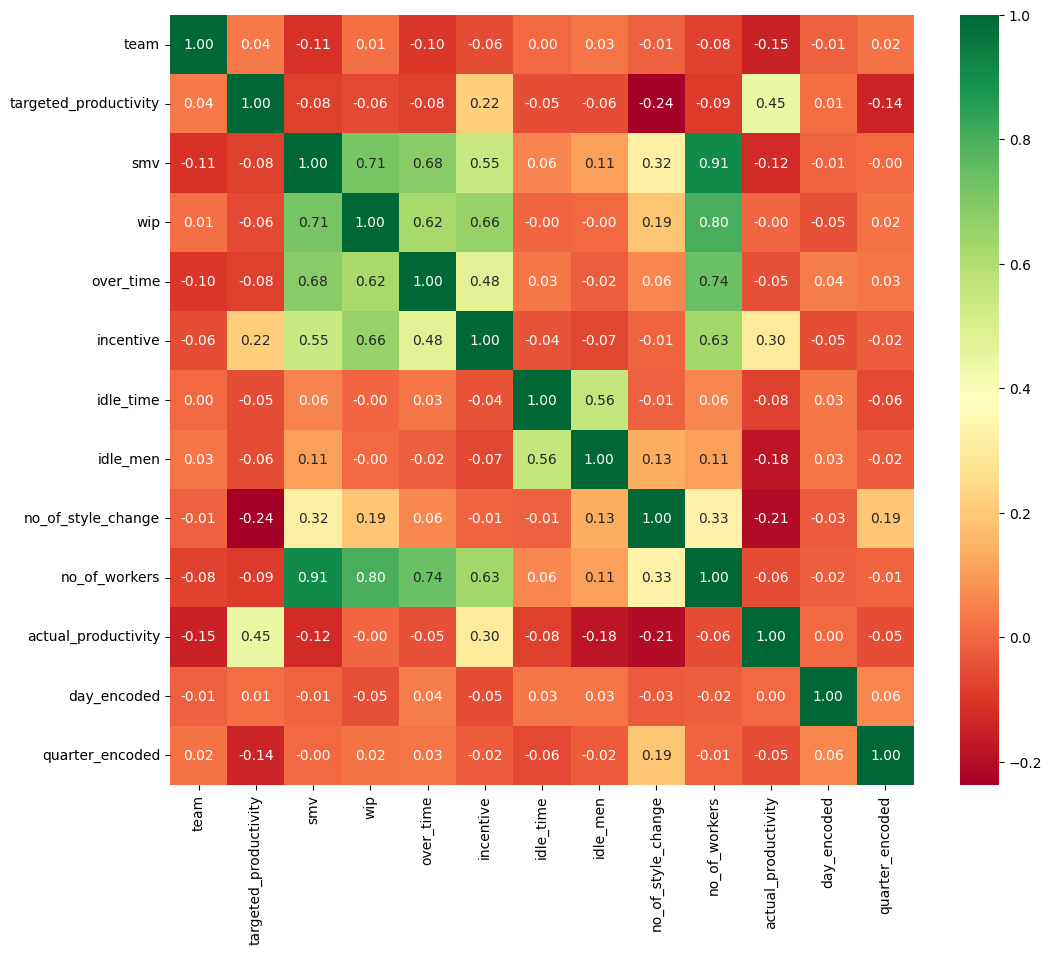

In [ ]:
choose_feature = df4.select_dtypes(include=[np.number])
corr_matrix = choose_feature.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

variabel yang berkorelasi positif (di atas 0) dengan variabel target :

1. target_productivity

2. incentive

Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

In [ ]:
selected_features = X.columns[rfe.support_]
print(f"Fitur terbaik berdasarkan RFE: {selected_features}")

Fitur terbaik berdasarkan RFE: Index(['team', 'targeted_productivity', 'idle_men', 'no_of_style_change',
       'department_finishing'],
      dtype='object')


In [ ]:
fitur_rank = pd.DataFrame({'Fitur': X.columns, 'Rank': rfe.ranking_})
fitur_rank = fitur_rank.sort_values(by='Rank', ascending=True)
print(fitur_rank)

                    Fitur  Rank
0                    team     1
1   targeted_productivity     1
7                idle_men     1
8      no_of_style_change     1
11   department_finishing     1
12      department_sewing     2
2                     smv     3
9           no_of_workers     4
5               incentive     5
10            day_encoded     6
13        quarter_encoded     7
6               idle_time     8
3                     wip     9
4               over_time    10


In [ ]:
# menggunakan korelasi pearson
# selected_columns =['targeted_productivity', 'incentive', 'wip',
#                    'department_finishing', 'day_encoded']

# menggunakan RFE
X_new = pd.DataFrame(X_rfe, columns=selected_features)

# menggunakan heatmap
# selected_columns = ['targeted_productivity', 'wip', 'incentive']

# menggunakan K-Best
# selected_columns = ['smv', 'idle_time', 'no_of_workers', 'department_finishing',
#        'department_sewing']
# X_new = X[selected_columns]

In [ ]:
X_new['department_finishing'] = X_new['department_finishing'].astype(bool)

In [ ]:
X_new.head()

,team,targeted_productivity,idle_men,no_of_style_change,department_finishing
0,8.0,0.80,0.0,0.0,False
1,1.0,0.75,0.0,0.0,True
2,11.0,0.80,0.0,0.0,False
3,12.0,0.80,0.0,0.0,False
4,6.0,0.80,0.0,0.0,False


In [ ]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   float64
 1   targeted_productivity  1197 non-null   float64
 2   idle_men               1197 non-null   float64
 3   no_of_style_change     1197 non-null   float64
 4   department_finishing   1197 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 38.7 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

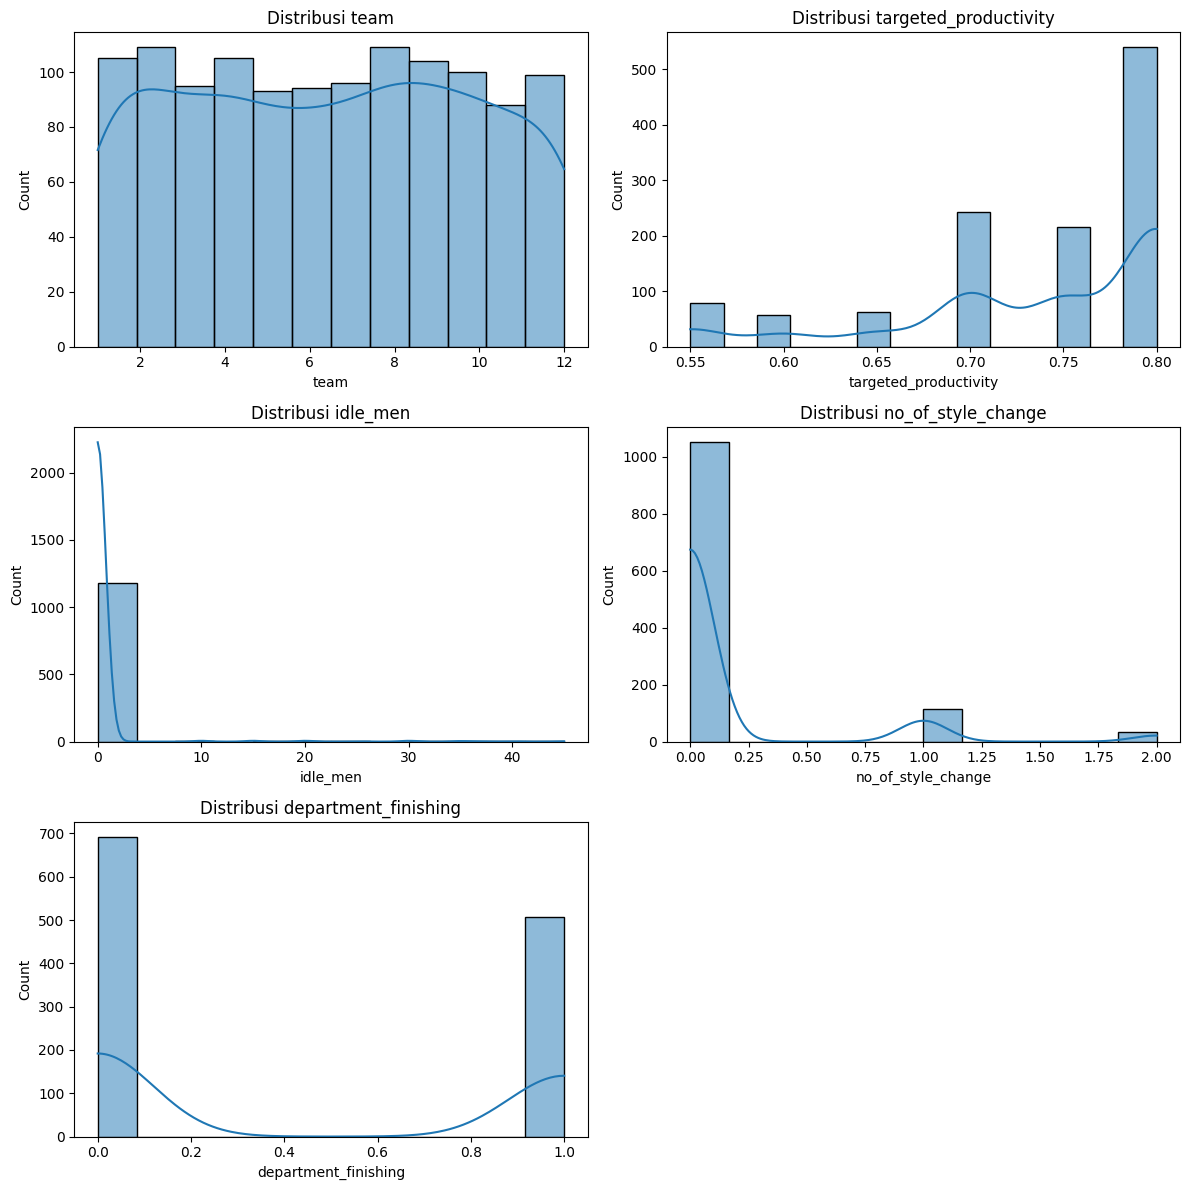

In [ ]:
import math

num_features = len(X_new.columns)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(X_new.columns):
    sns.histplot(X_new[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
X_new = X_new.reset_index(drop=True)
y = y.reset_index(drop=True)
df5_2 = pd.concat([X_new, y], axis=1)
df5_2

,team,targeted_productivity,idle_men,no_of_style_change,department_finishing,actual_productivity
0,8.0,0.80,0.0,0.0,0.0,0.940725
1,1.0,0.75,0.0,0.0,1.0,0.886500
2,11.0,0.80,0.0,0.0,0.0,0.800570
3,12.0,0.80,0.0,0.0,0.0,0.800570
4,6.0,0.80,0.0,0.0,0.0,0.800382
...,...,...,...,...,...,...
1192,10.0,0.75,0.0,0.0,1.0,0.628333
1193,8.0,0.70,0.0,0.0,1.0,0.625625
1194,7.0,0.65,0.0,0.0,1.0,0.625625
1195,9.0,0.75,0.0,0.0,1.0,0.505889


In [ ]:
y.mean()

0.7350910969791145

In [ ]:
X_resampled = X_new
y_resampled = y

In [ ]:
X_resampled.info()
print("\n")
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   float64
 1   targeted_productivity  1197 non-null   float64
 2   idle_men               1197 non-null   float64
 3   no_of_style_change     1197 non-null   float64
 4   department_finishing   1197 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 38.7 KB


<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: actual_productivity
Non-Null Count  Dtype  
--------------  -----  
1197 non-null   float64
dtypes: float64(1)
memory usage: 9.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [ ]:
print("Dimensi data latih:", X_train.shape)
print("Dimensi data uji:", X_test.shape)

Dimensi data latih: (957, 5)
Dimensi data uji: (240, 5)


In [ ]:
print("Dimensi label latih:", y_train.shape)
print("Dimensi label uji:", y_test.shape)

Dimensi label latih: (957,)
Dimensi label uji: (240,)


Latih Data

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(kernel='rbf'),
    "MLP Regressor": MLPRegressor(max_iter=1000),
    "XGboost": XGBRegressor(),
}

1. Mean Absolute Error (MAE) lebih rendah lebih akurat

2. Mean Squared Error (MSE) lebih kecil, prediksi lebih tepat

3. Symmetric Mean Absolute Percentage Error (SMAPE) : dalam bentuk persentase. lebih kecil menunjukkan model lebih akurat.

4. R2 Score, lebih tinggi maka model lebih baik

In [ ]:
print("------------------LATIH DATA\n")
for nama_model, model in models.items():
    print(f"Model: {nama_model}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    smape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
    r2 = r2_score(y_train, y_pred) * 100

    print(f"MAE {nama_model}: {mae:.4f}")
    print(f"MSE {nama_model}: {mse:.4f}")
    print(f"RMSE {nama_model}: {rmse:.4f}")
    print(f"SMAPE {nama_model}: {smape:.4f}%")
    print(f"R2 Score {nama_model}: {r2:.4f}%")
    print("\n")

------------------LATIH DATA

Model: Linear Regression
MAE Linear Regression: 0.1079
MSE Linear Regression: 0.0229
RMSE Linear Regression: 0.1513
SMAPE Linear Regression: 19.2003%
R2 Score Linear Regression: 26.9580%


Model: KNeighbors Regressor
MAE KNeighbors Regressor: 0.0960
MSE KNeighbors Regressor: 0.0198
RMSE KNeighbors Regressor: 0.1408
SMAPE KNeighbors Regressor: 16.9408%
R2 Score KNeighbors Regressor: 36.7450%


Model: Decision Tree
MAE Decision Tree: 0.0781
MSE Decision Tree: 0.0152
RMSE Decision Tree: 0.1232
SMAPE Decision Tree: 13.6057%
R2 Score Decision Tree: 51.5678%


Model: Random Forest
MAE Random Forest: 0.0809
MSE Random Forest: 0.0154
RMSE Random Forest: 0.1242
SMAPE Random Forest: 14.2722%
R2 Score Random Forest: 50.8381%


Model: Support Vector Machine
MAE Support Vector Machine: 0.1179
MSE Support Vector Machine: 0.0244
RMSE Support Vector Machine: 0.1563
SMAPE Support Vector Machine: 21.4499%
R2 Score Support Vector Machine: 22.0942%


Model: MLP Regressor
MAE 

In [ ]:
print("------------------UJI DATA\n")
for nama_model, model in models.items():
    print(f"Model: {nama_model}")
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    smape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred) * 100

    print(f"MAE {nama_model}: {mae:.4f}")
    print(f"MSE {nama_model}: {mse:.4f}")
    print(f"RMSE {nama_model}: {rmse:.4f}")
    print(f"SMAPE {nama_model}: {smape:.4f}%")
    print(f"R2 Score {nama_model}: {r2:.4f}%")
    print("\n\n")

------------------UJI DATA

Model: Linear Regression
MAE Linear Regression: 0.1015
MSE Linear Regression: 0.0210
RMSE Linear Regression: 0.1449
SMAPE Linear Regression: 17.2868%
R2 Score Linear Regression: 20.9321%



Model: KNeighbors Regressor
MAE KNeighbors Regressor: 0.0897
MSE KNeighbors Regressor: 0.0157
RMSE KNeighbors Regressor: 0.1254
SMAPE KNeighbors Regressor: 15.1561%
R2 Score KNeighbors Regressor: 40.8225%



Model: Decision Tree
MAE Decision Tree: 0.0576
MSE Decision Tree: 0.0091
RMSE Decision Tree: 0.0955
SMAPE Decision Tree: 9.1756%
R2 Score Decision Tree: 65.6208%



Model: Random Forest
MAE Random Forest: 0.0691
MSE Random Forest: 0.0103
RMSE Random Forest: 0.1013
SMAPE Random Forest: 11.2802%
R2 Score Random Forest: 61.3204%



Model: Support Vector Machine
MAE Support Vector Machine: 0.1129
MSE Support Vector Machine: 0.0227
RMSE Support Vector Machine: 0.1508
SMAPE Support Vector Machine: 19.4850%
R2 Score Support Vector Machine: 14.3589%



Model: MLP Regressor
MA

Hasil Model

Regresi linear : pada training menunjukkan model hanya dapat menjelaskan sekitar 27% variasi data.
Namun, saat uji data sedikit menurun, menunjukkan model kurang fit dengan data pengujian.

KNN : mengalami kenaikan saat uji data, model ini memiliki performa yang cukup baik

Decision tree : model ini memiliki kinerja yang baik pada data uji dan meningkat dari latih data

Random forest : model ini memiliki kinerja yang baik pada data uji dan meningkat dari latih data

SVM : menunjukkan penurunan dari latih data ke uji data, model ini memiliki performa yang buruk saat uji data

MLP : tidak mengalami kenaikan

XGBoost : menunjukkan kenaikan saat uji data, yang berarti model ini memiliki performa yang baik

**3 Model Terbaik**

a. Decision Tree

b. XGBoost

c. Random Forest

Hyperparameter Tunning

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score", random_search.best_score_)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Best Score -0.021782636038921197


In [ ]:
dt_best = dt = DecisionTreeRegressor(
    min_samples_split=2,
    min_samples_leaf=1,
    max_features= None,
    max_depth= 5
)

dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
smape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred) * 100

print(f"MAE Decision Tree: {mae:.4f}")
print(f"MSE Decision Tree: {mse:.4f}")
print(f"RMSE Decision Tree: {rmse:.4f}")
print(f"SMAPE Decision Tree: {smape:.4f}%")
print(f"R2 Score Decision Tree: {r2:.4f}%")

MAE Decision Tree: 0.1017
MSE Decision Tree: 0.0206
RMSE Decision Tree: 0.1434
SMAPE Decision Tree: 16.7148%
R2 Score Decision Tree: 22.5341%


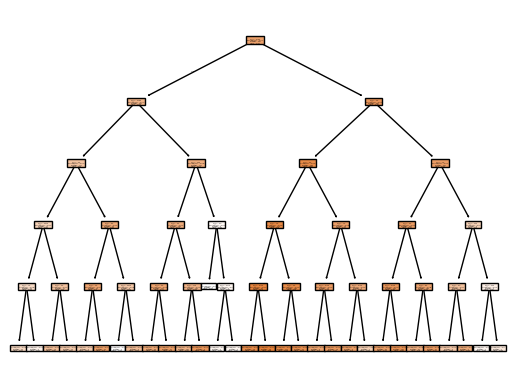

In [ ]:
from sklearn import tree

tree_plot = tree.plot_tree(dt_best, filled=True)

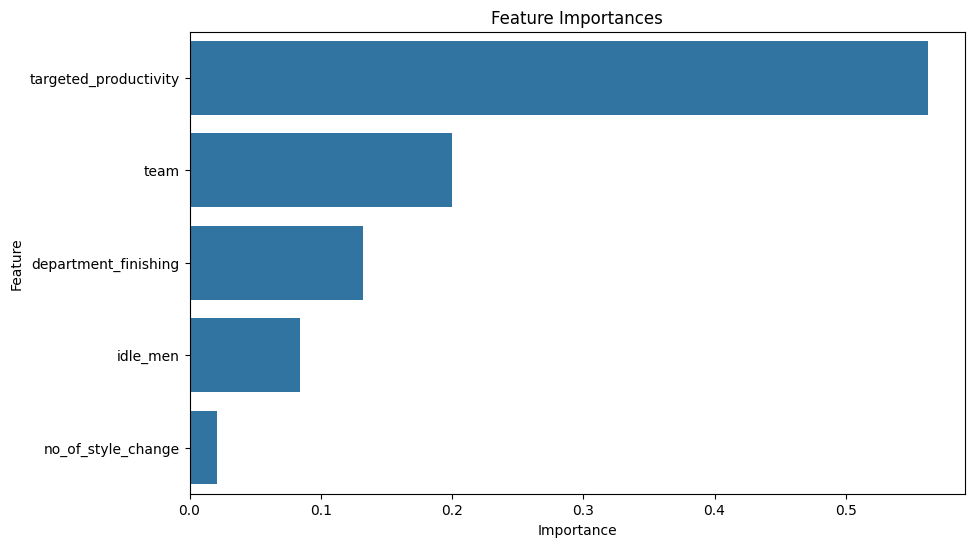

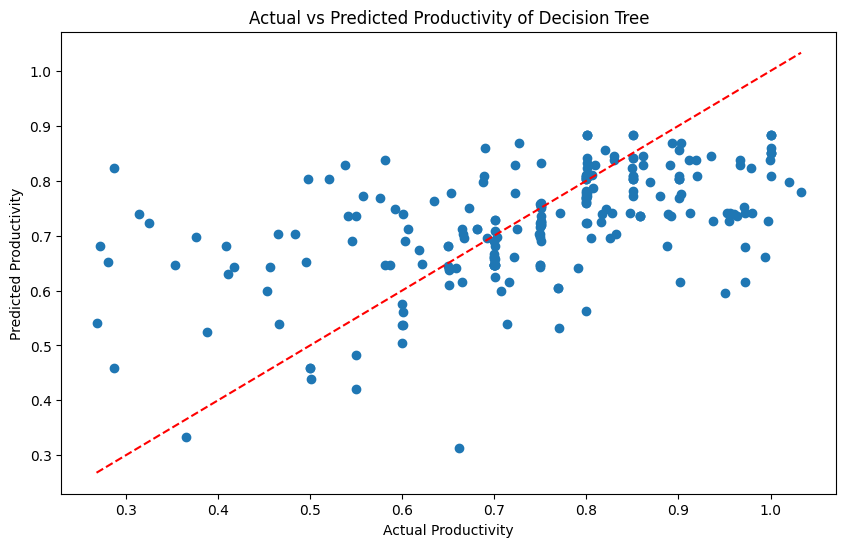

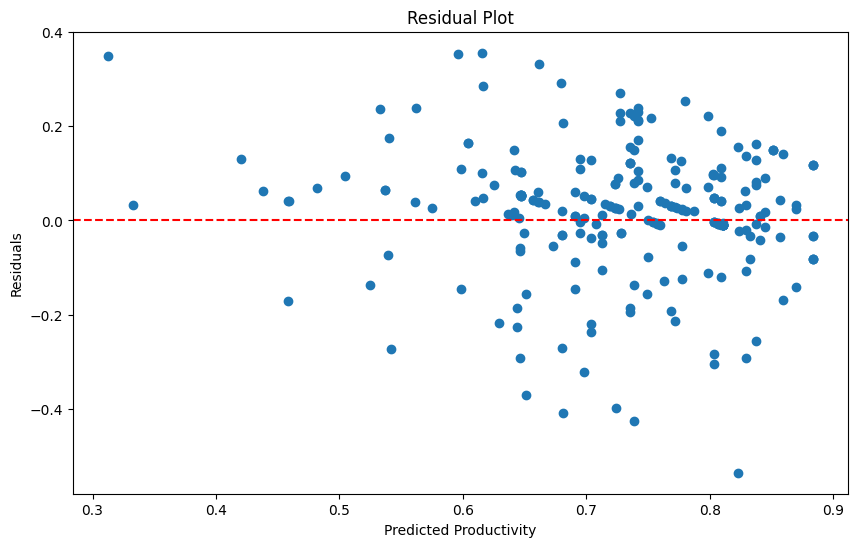

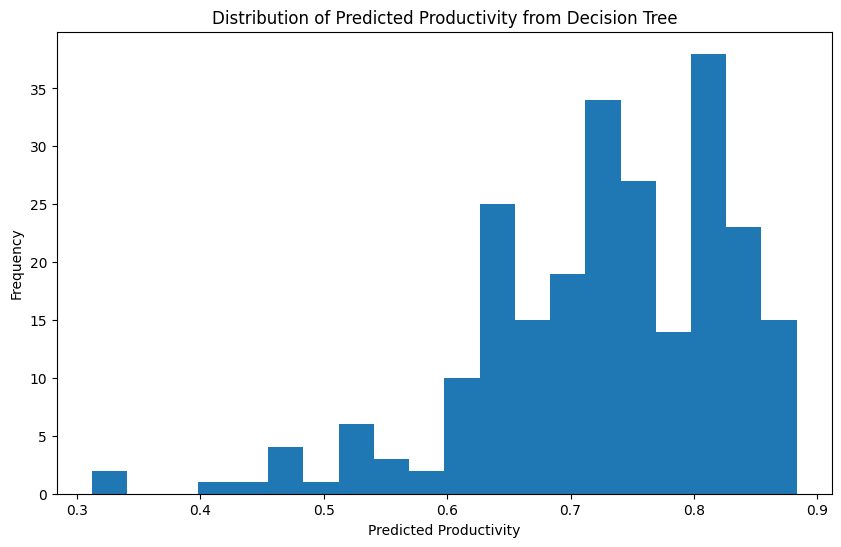

In [74]:
importances = dt_best.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Actual vs Predicted Productivity of Decision Tree')
plt.show()


# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Productivity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=20)
plt.xlabel("Predicted Productivity")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Productivity from Decision Tree")
plt.show()

In [ ]:
# Random Forest
rf = RandomForestRegressor()

param_rf = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt', None]
}

rf2 = RandomizedSearchCV(rf,
                        param_distributions=param_rf,
                        n_iter=20,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=0)

rf2.fit(X_train, y_train)

print("Best Parameters:", rf2.best_params_)
print("Best Score", rf2.best_score_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best Score -0.02077038425453354


In [ ]:
rf_best = RandomForestRegressor(
    min_samples_split = 10,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 20
)

rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
smape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred) * 100

print(f"MAE Random Forest: {mae:.4f}")
print(f"MSE Random Forest: {mse:.4f}")
print(f"RMSE Random Forest: {rmse:.4f}")
print(f"SMAPE Random Forest: {smape:.4f}%")
print(f"R2 Score Random Forest: {r2:.4f}%")

MAE Random Forest: 0.0991
MSE Random Forest: 0.0191
RMSE Random Forest: 0.1382
SMAPE Random Forest: 16.0384%
R2 Score Random Forest: 28.1204%


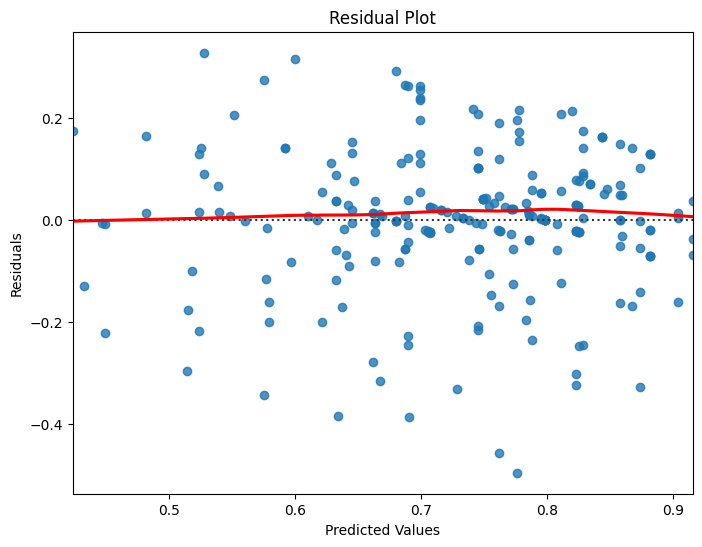

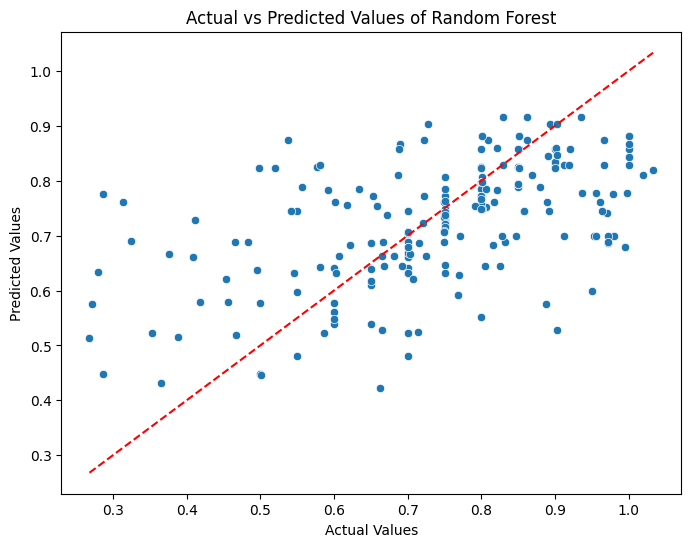

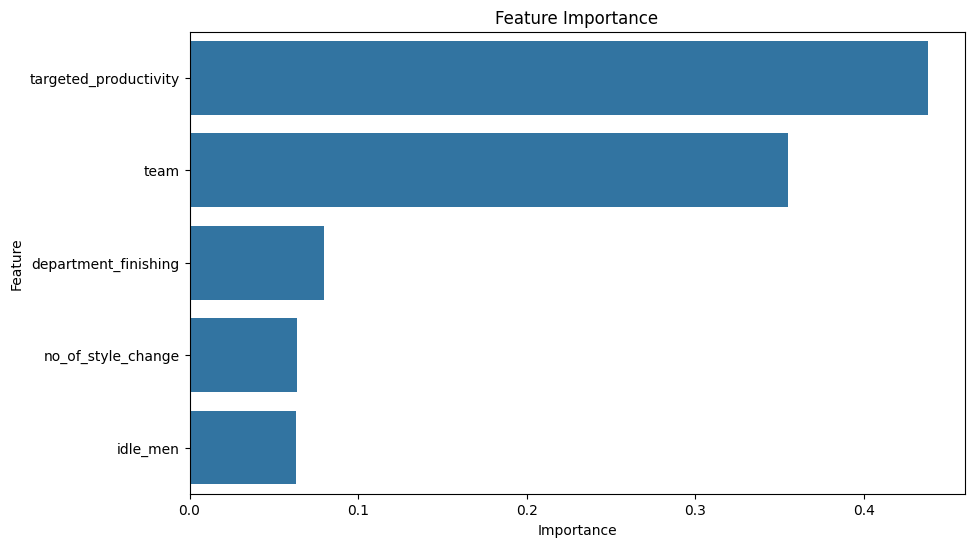

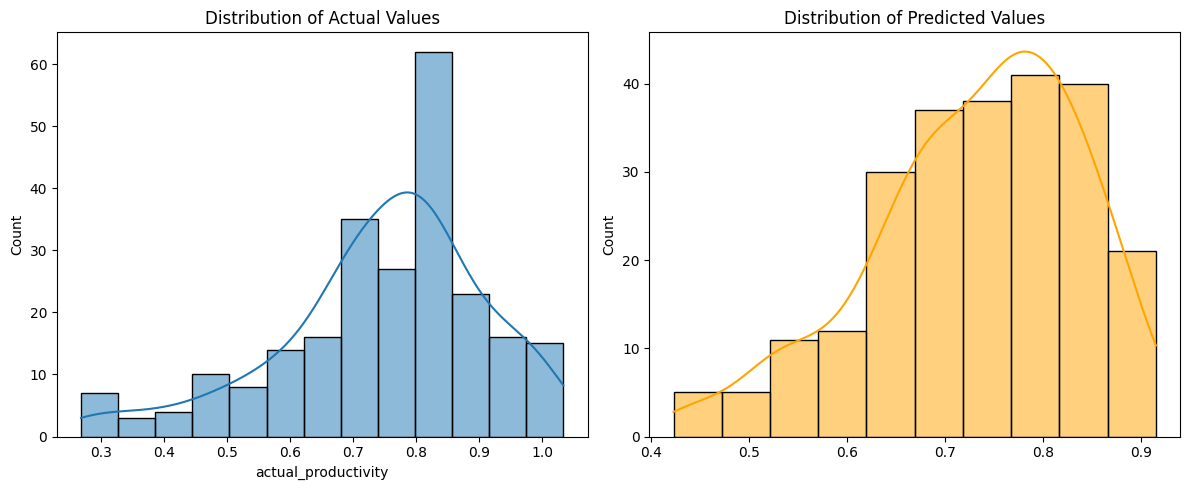

RMSE: 0.1381514360806338


In [75]:
y_pred = rf_best.predict(X_test)

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.title('Actual vs Predicted Values of Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Feature Importance
feature_importance = rf_best.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


# Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True)
plt.title('Distribution of Actual Values')

plt.subplot(1, 2, 2)
sns.histplot(y_pred, kde=True, color='orange')
plt.title('Distribution of Predicted Values')

plt.tight_layout()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

In [ ]:
# XGBoost
xgb = XGBRegressor()

param_xgb = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_xgb,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error'
)

random_search_xgb.fit(X_train, y_train)

print("Best Parameters:", random_search_xgb.best_params_)
print("Best Score", random_search_xgb.best_score_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score -0.02106638159150482


In [ ]:
xgb_best = XGBRegressor(
    n_estimators= 30,
    learning_rate= 0.2,
    max_depth= 3,
    subsample= 0.8,
    colsample_bytree= 1.0
)

xgb_best.fit(X_train, y_train)
y_pred = xgb_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
smape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred) * 100

print(f"MAE XGBoost: {mae:.4f}")
print(f"MSE XGBoost: {mse:.4f}")
print(f"RMSE XGBoost: {rmse:.4f}")
print(f"SMAPE XGBoost: {smape:.4f}%")
print(f"R2 Score XGBoost: {r2:.4f}%")

MAE XGBoost: 0.1009
MSE XGBoost: 0.0196
RMSE XGBoost: 0.1399
SMAPE XGBoost: 16.5185%
R2 Score XGBoost: 26.2694%


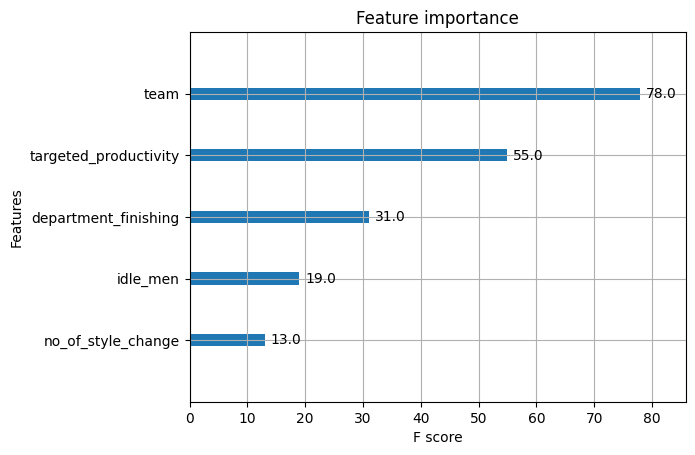

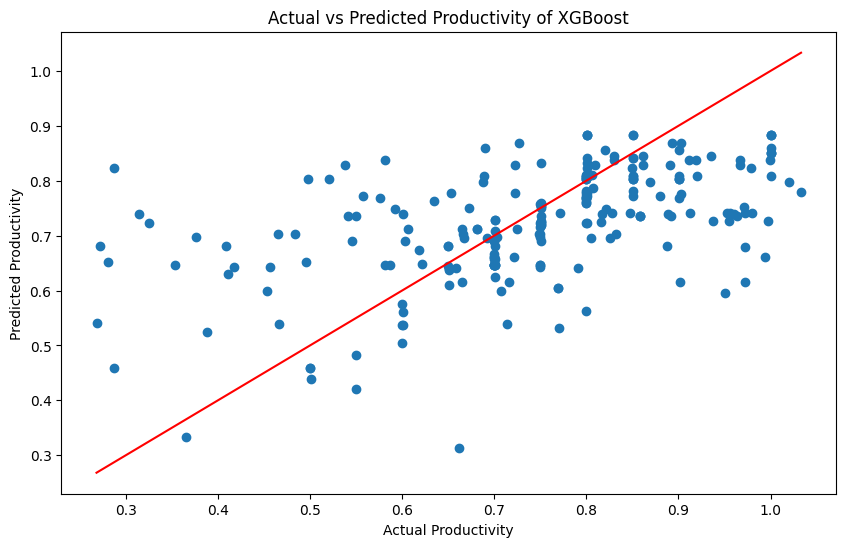

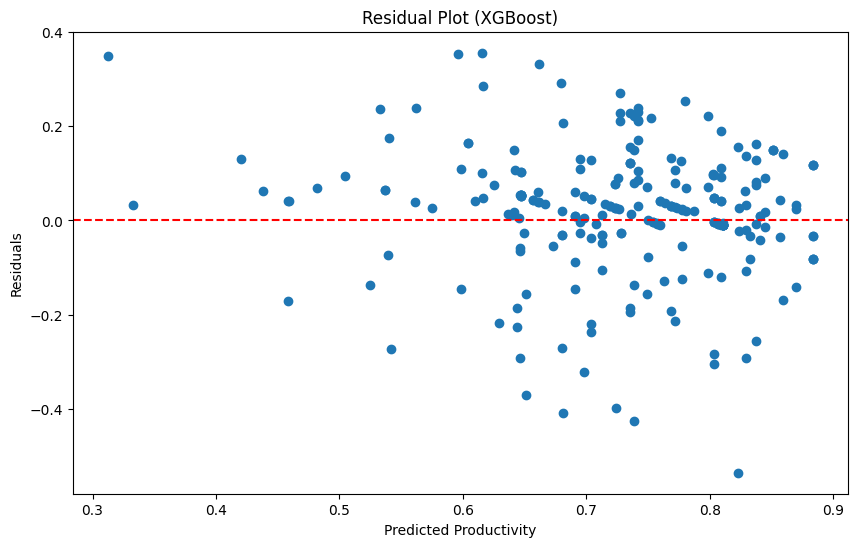

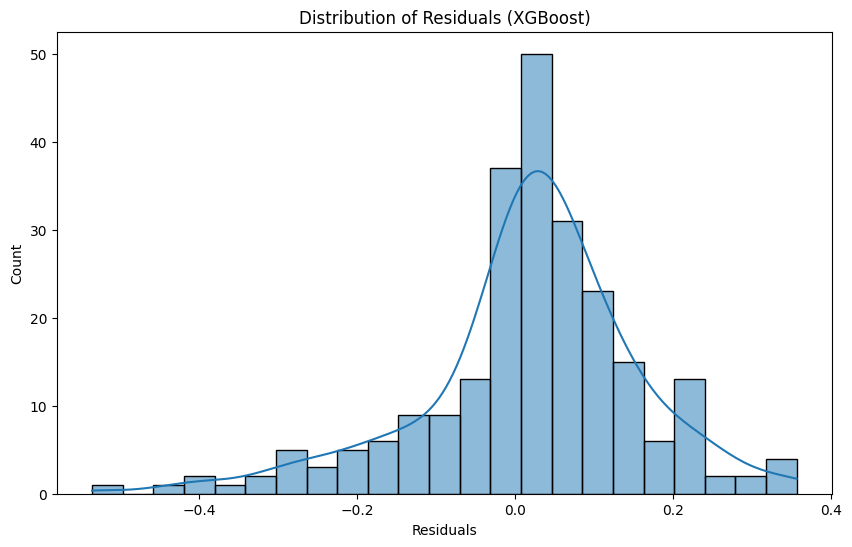

In [76]:
plot_importance(xgb_best)
plt.show()

y_pred = xgb_best.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Actual vs Predicted Productivity of XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Add a diagonal line for reference
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Productivity")
plt.ylabel("Residuals")
plt.title("Residual Plot (XGBoost)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Residuals distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals (XGBoost)")
plt.xlabel("Residuals")
plt.show()

Hasil Evaluasi:

Decision tree : model ini mengalami penurunan signifikan dalam R2 (dari 65.62% menjadi 22.53%) dan mengalami peningkatan pada MAE, MSE, dan SMAPE. Tuning ini membuat model lebih buruk dibandingkan sebelumnya.

random forest : mengalami sedikit penurunan dalam R2 (dari 61.32% menjadi 28.12%), model ini menunjukkan perbaikan dalam MAE, MSE, dan RMSE setelah tuning. Tuning meningkatkan akurasi model sedikit meskipun R² menurun.

xgboost : penurunan R2 (dari 65.57% menjadi 26.27%), XGBoost tetap memiliki kinerja yang cukup baik dengan MAE yang hampir sama dengan sebelumnya. Performa setelah tuning sedikit menurun.

In [ ]:
pip install shap

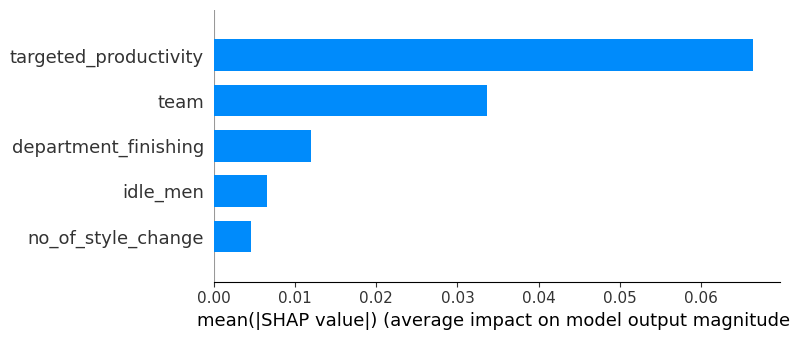

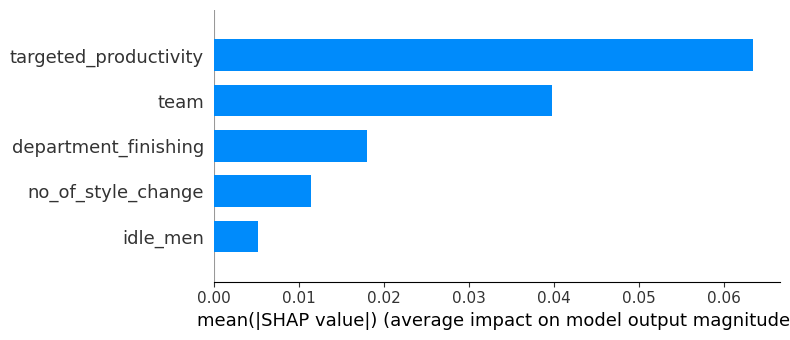

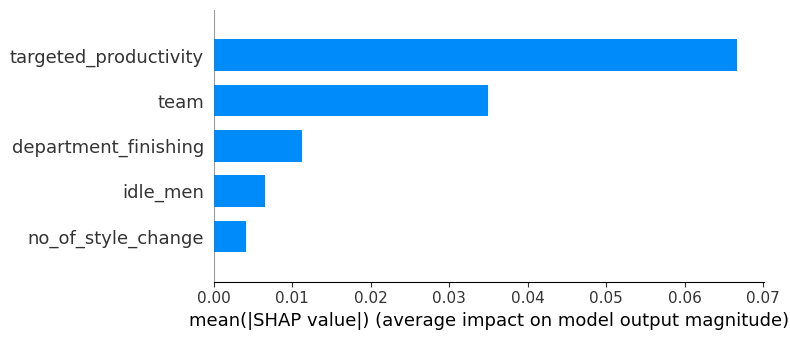

In [ ]:
import shap

# berdasarkan fitur engineer
def shap_model(model, X_test):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")

shap_model(dt_best, X_test)
shap_model(rf_best, X_test)
shap_model(xgb_best, X_test)

In [ ]:
df5. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  day_encoded            1197 non-null   int64  
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  quarter_encoded        1197 non-null   int64  
dtypes: b

In [ ]:
X_predictor = df5. drop(columns=['actual_productivity'])

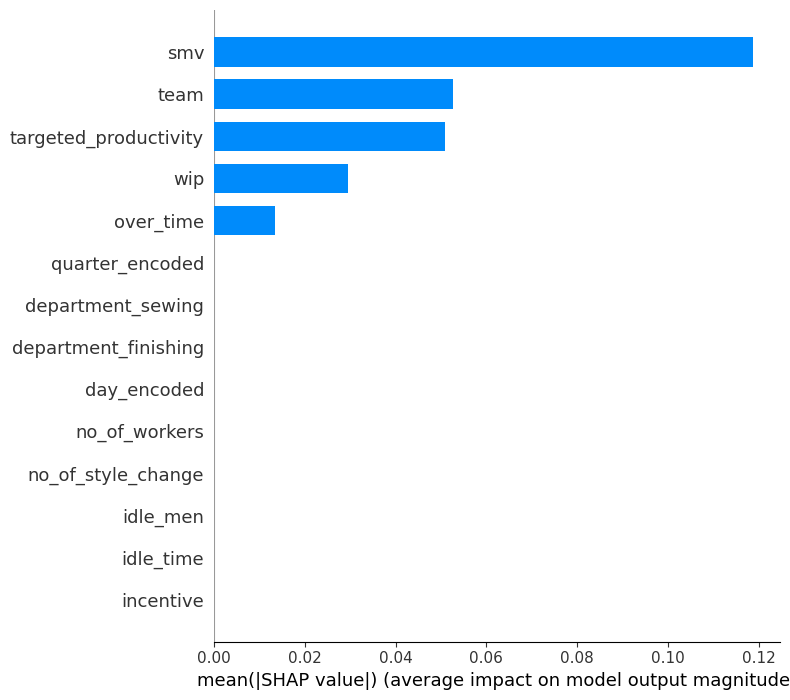

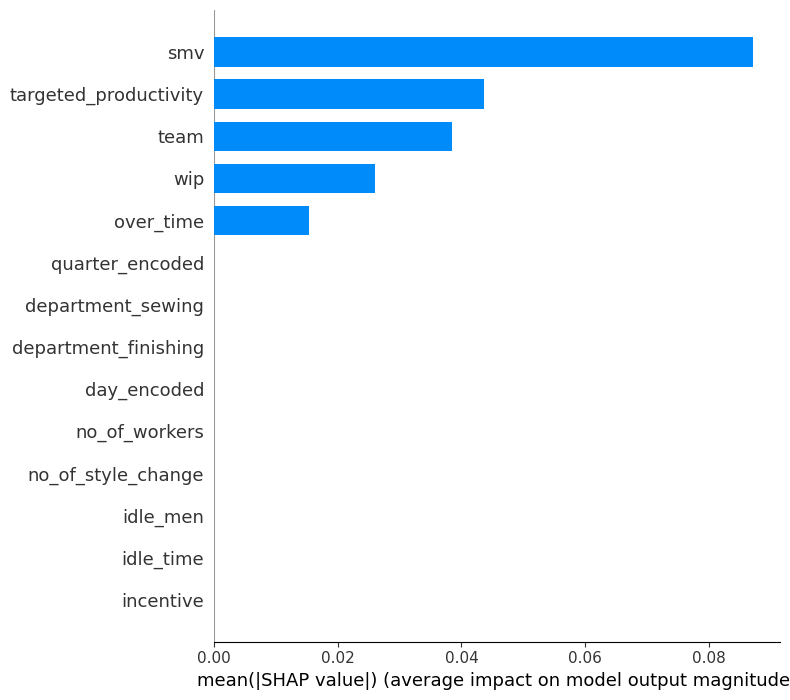

In [ ]:
# berdasarkan keseluruhan fitur
def shap_model(model, X_predictor):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_predictor)
    shap.summary_plot(shap_values,X_predictor, plot_type="bar")

shap_model(dt_best,X_predictor )
shap_model(rf_best, X_predictor)
#shap_model(xgb_best, X_predictor)